# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# checking head
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# checking shape
df.shape

(32560, 15)

data has 32560 rows and 15 columns

In [5]:
# checking columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Data Cleaning

In [6]:
#checking for all the null values in the columns
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Above observations shows that there are no null values present in this dataset.

In [7]:
# checking datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observations shows that some columns are integer type and rest are object type.

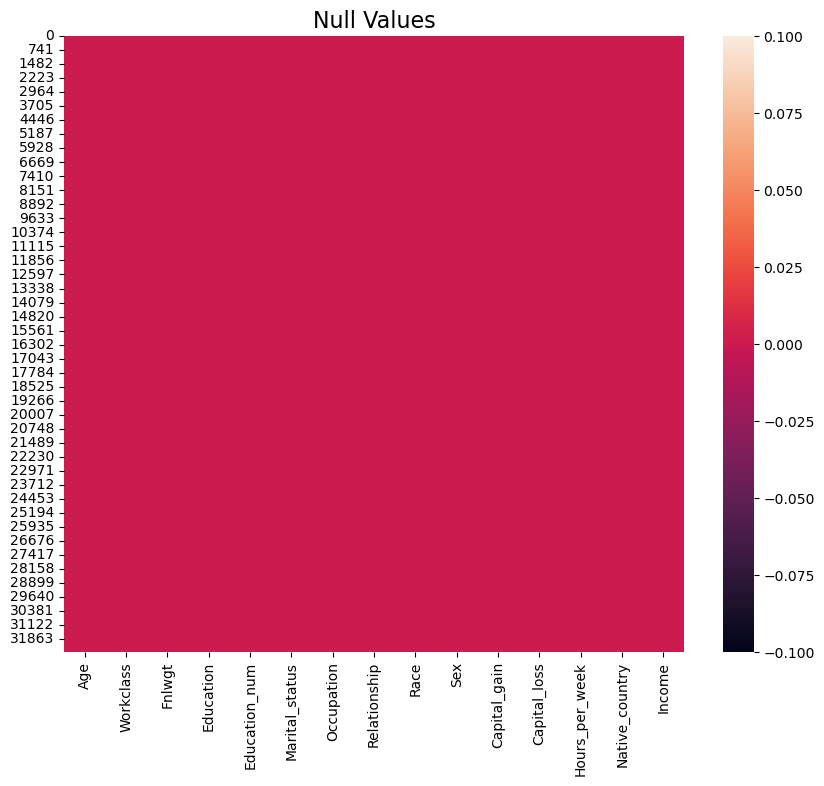

In [8]:
# ploting the heatmap to check null values
plt.figure(figsize=(10,8))
plt.title('Null Values',fontsize=16)
sns.heatmap(df.isnull());

This above heatmap displays that null values are present in this dataset.

# Expolatory Data Analysis (EDA)

In [9]:
# checking statistical summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Statistical Data Summary:

There is no missing value present in the numerical columns as count of each column is 32560 . minimum Age of a person who earns monney is 17 and maximun age is 90 and average age is 38.

Maybe the fnlwgt is the sampling weight,fnlwgt is not related to the target variable 'income' and will be removed before building the model.

Capital gain and capital loss is maybe outcome( profit or loss ) of investment of a person other than his salary. 

Hours per week is showing how much time one person is spending for work per week. and it's showing minimum 1 hour to maximum 99

hours people do work and average time hour per week is 40 hours. The difference between min and max is big so we need to check the skewness.

The values are on different scales.Hence, we will use StandardScaler from the sklearn library to scale the features.

In [10]:
# checking the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# checking unique values in columns
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Univariate analysis

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


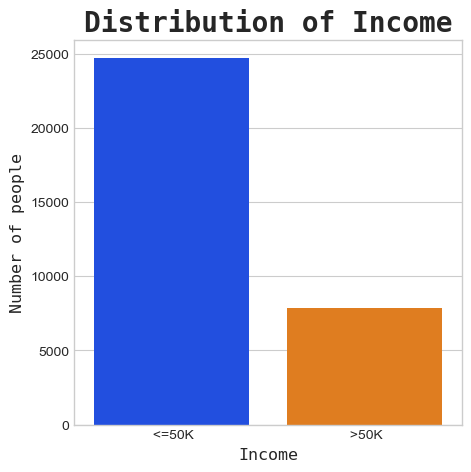

In [12]:
# Creating a barplot for 'Income'
income = df['Income'].value_counts()
print(income)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=10)
plt.show()

There are three times more records in income-[<=50k] class than in income-[>50k] class, means the dataset is imbalanced.

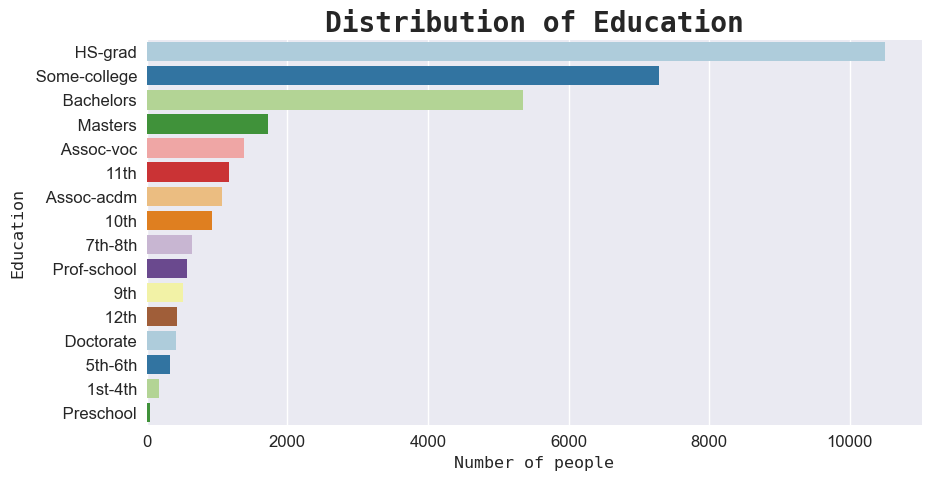

In [13]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values,y= edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.show()

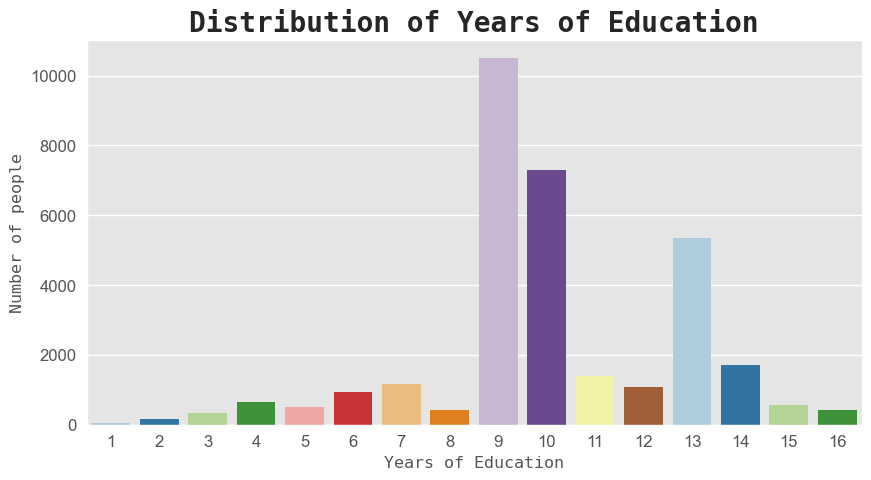

In [14]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='Paired')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.show()

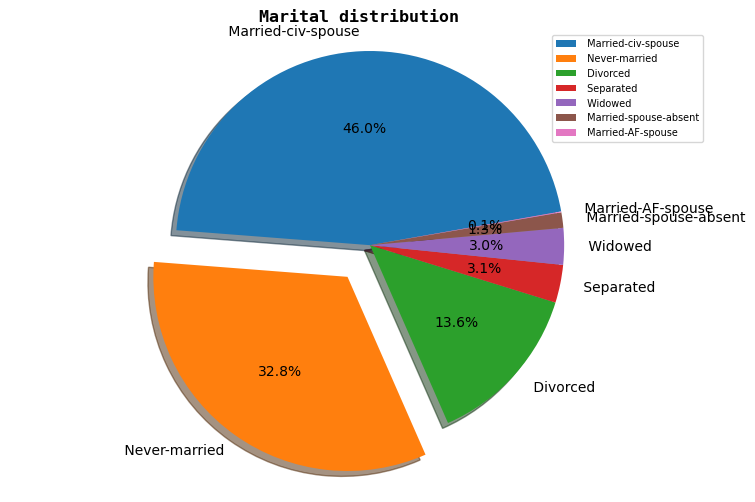

In [15]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(9, 6))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 12, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Above piechart shows the percentages of different marital categories.

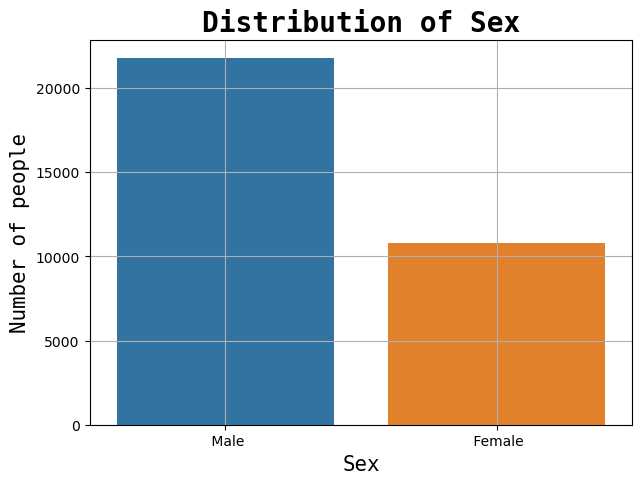

In [16]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

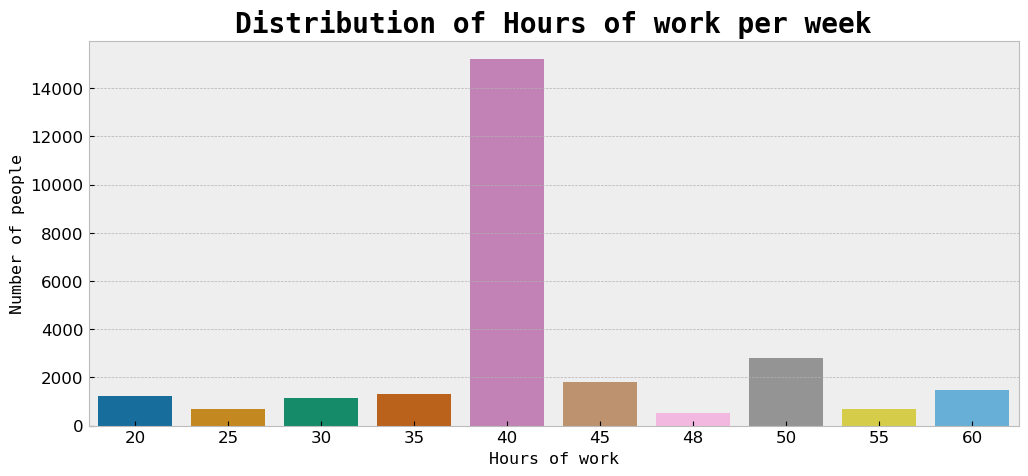

In [17]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(12, 5))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.show()

Bivariate analysis:-

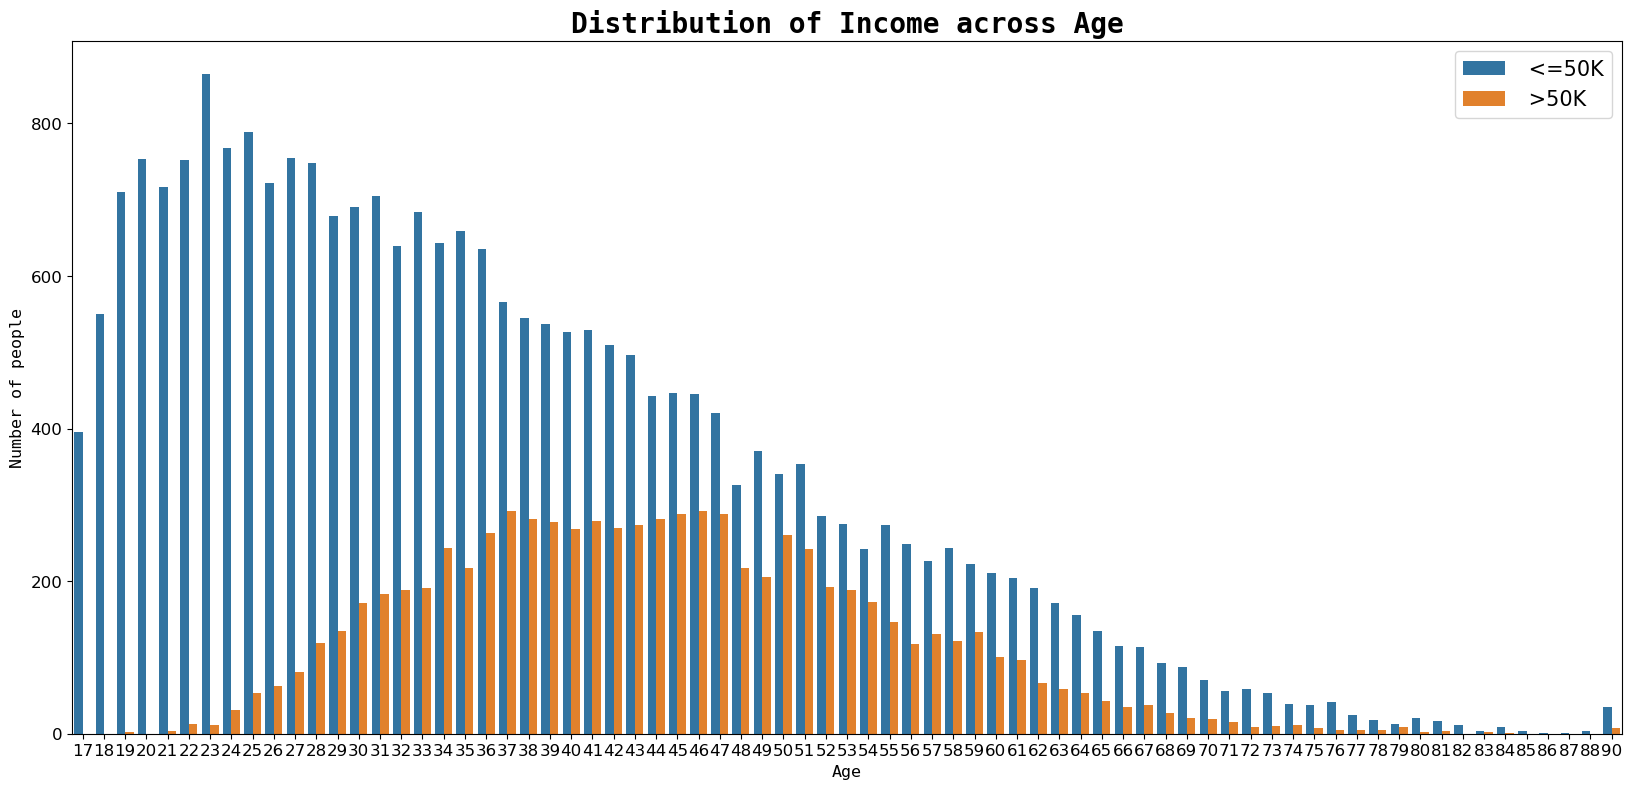

In [18]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 9))
sns.countplot(x=df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Above chart shows that people in lower age group[17-20] and very high old age group[80-90] are having their income range less than 50k whereas maximum people that belongs to middle age group are having their income in range more than 50k.

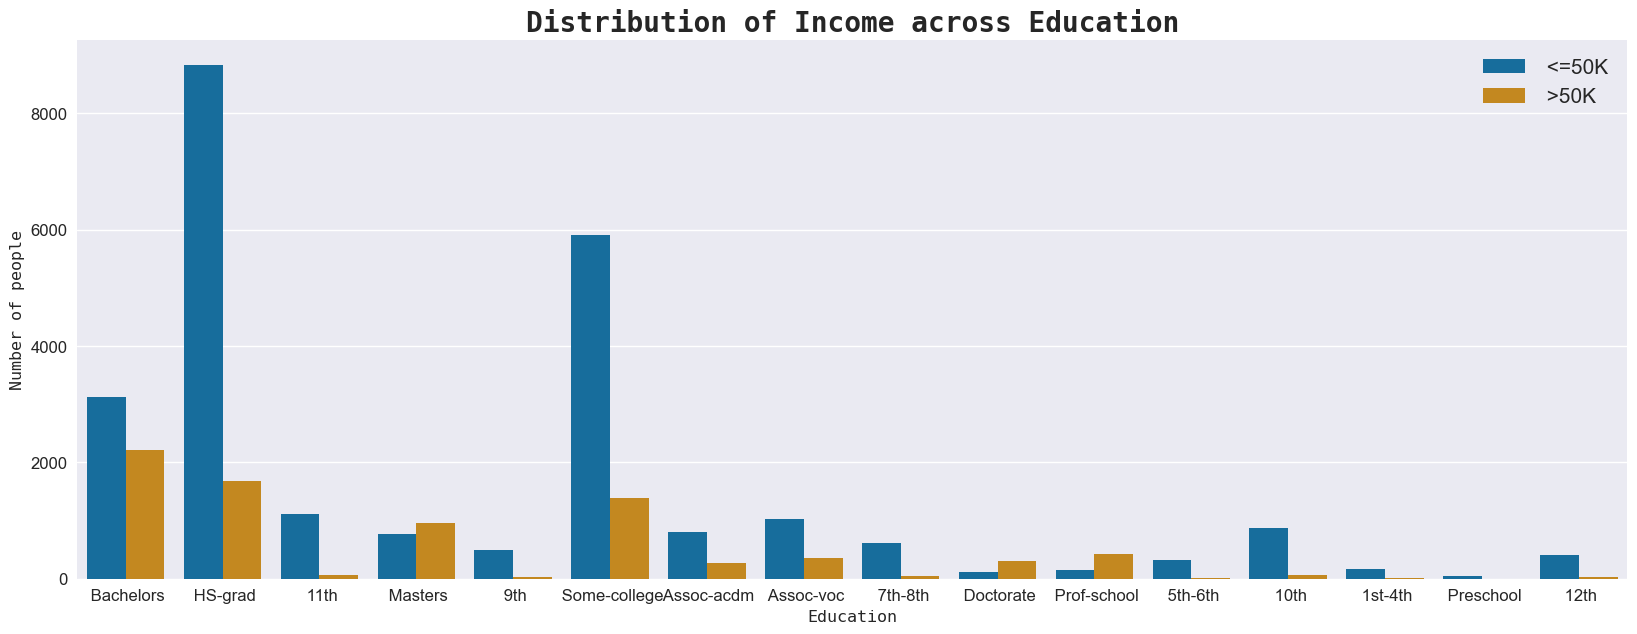

In [19]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Above countplot shows that people with higher educational qualification/degree specially 'HS-grad','Some college' are having good income range.

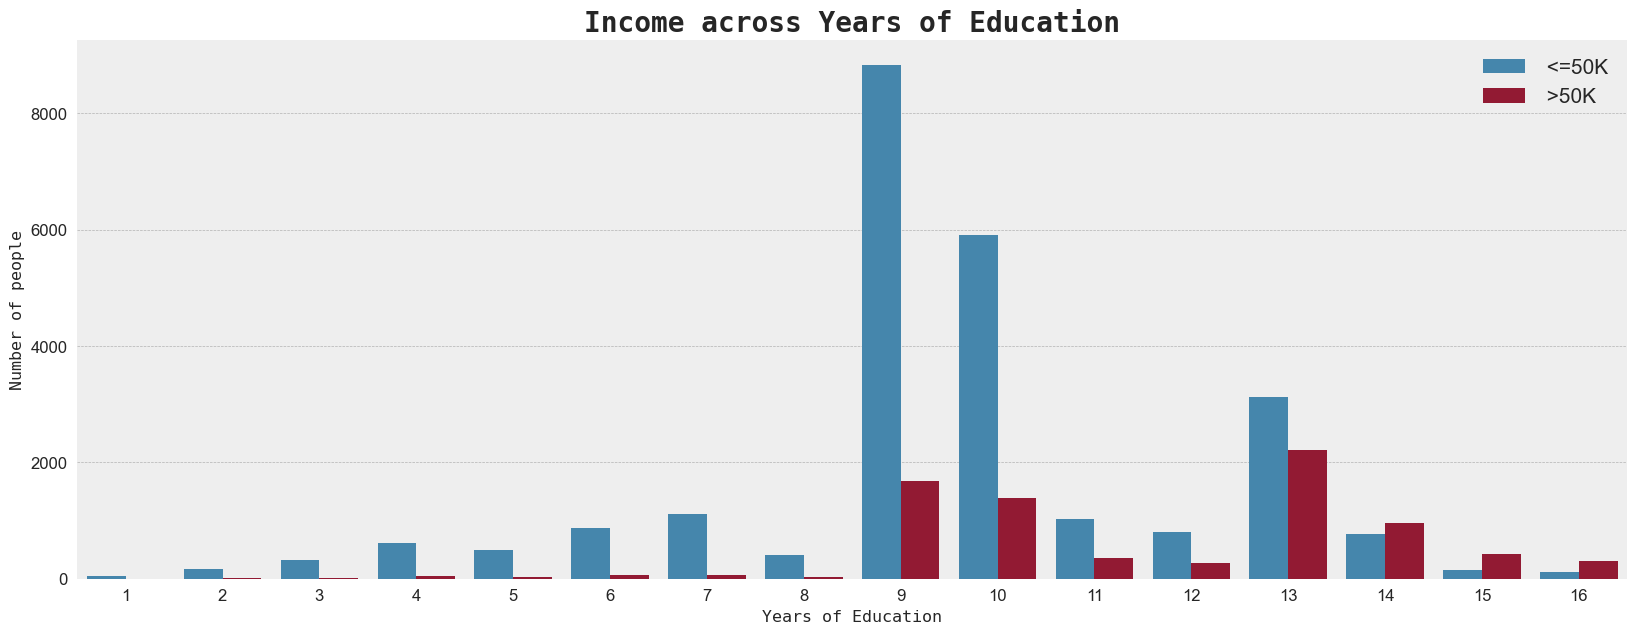

In [20]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

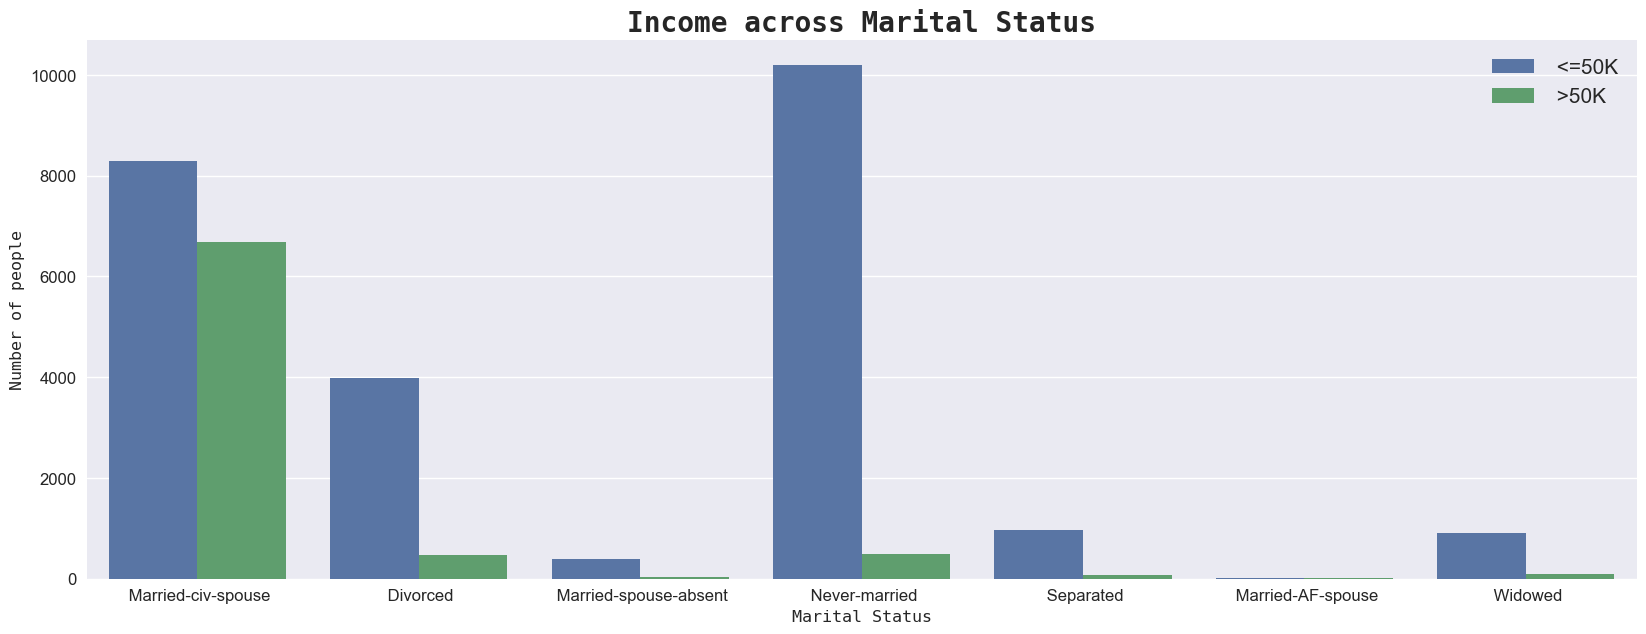

In [21]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


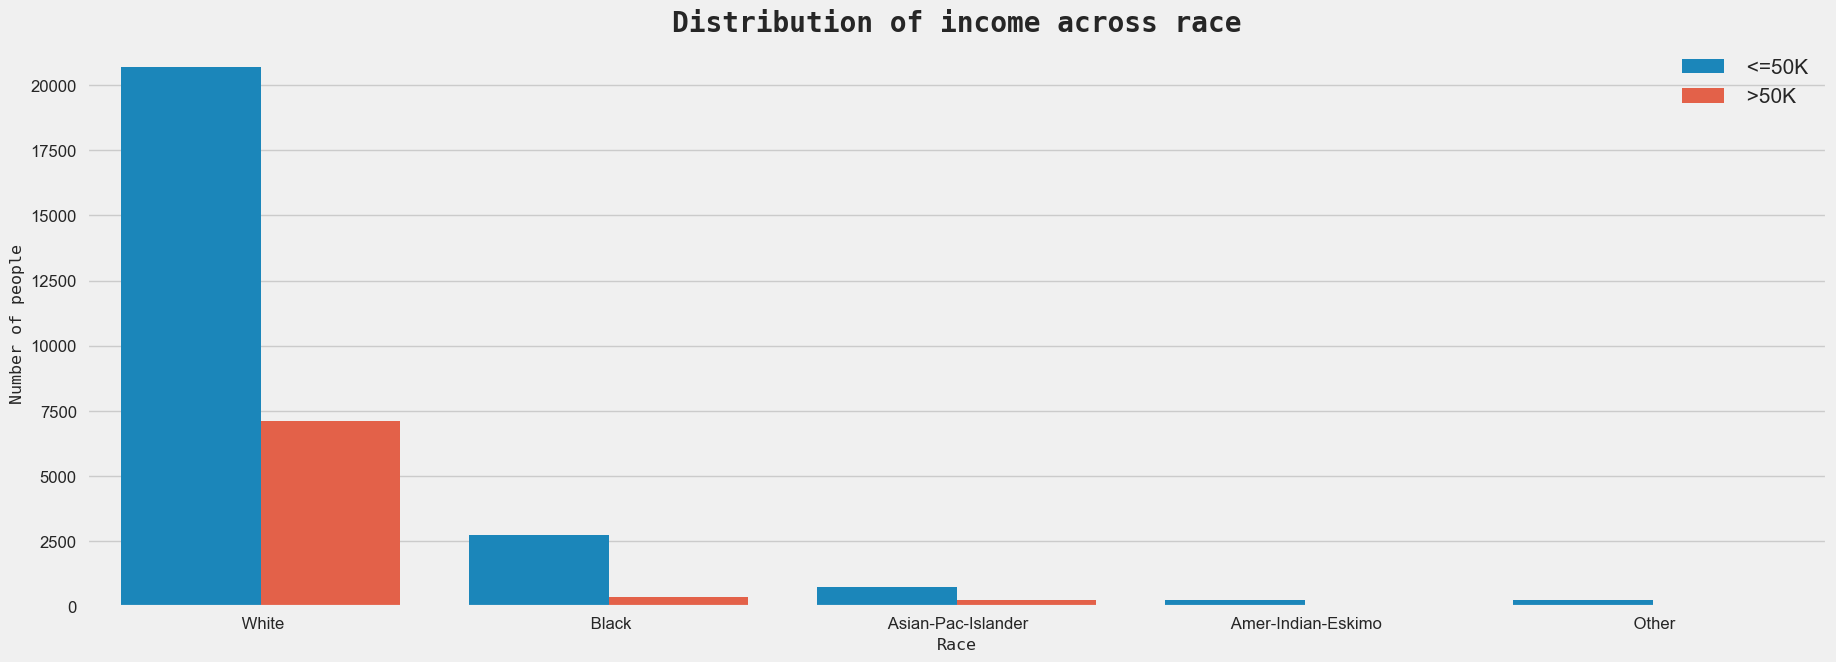

In [22]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Race'], hue=df['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

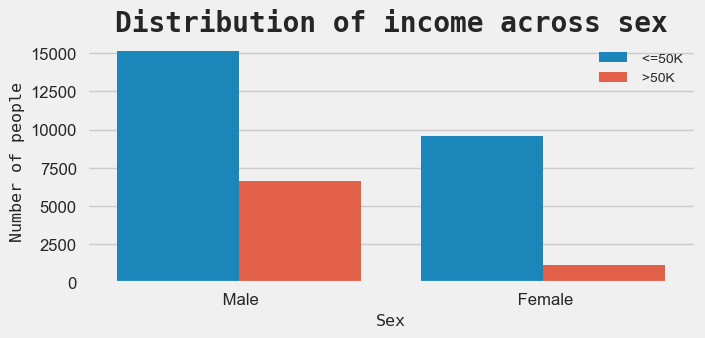

In [23]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

Multivariate analysis

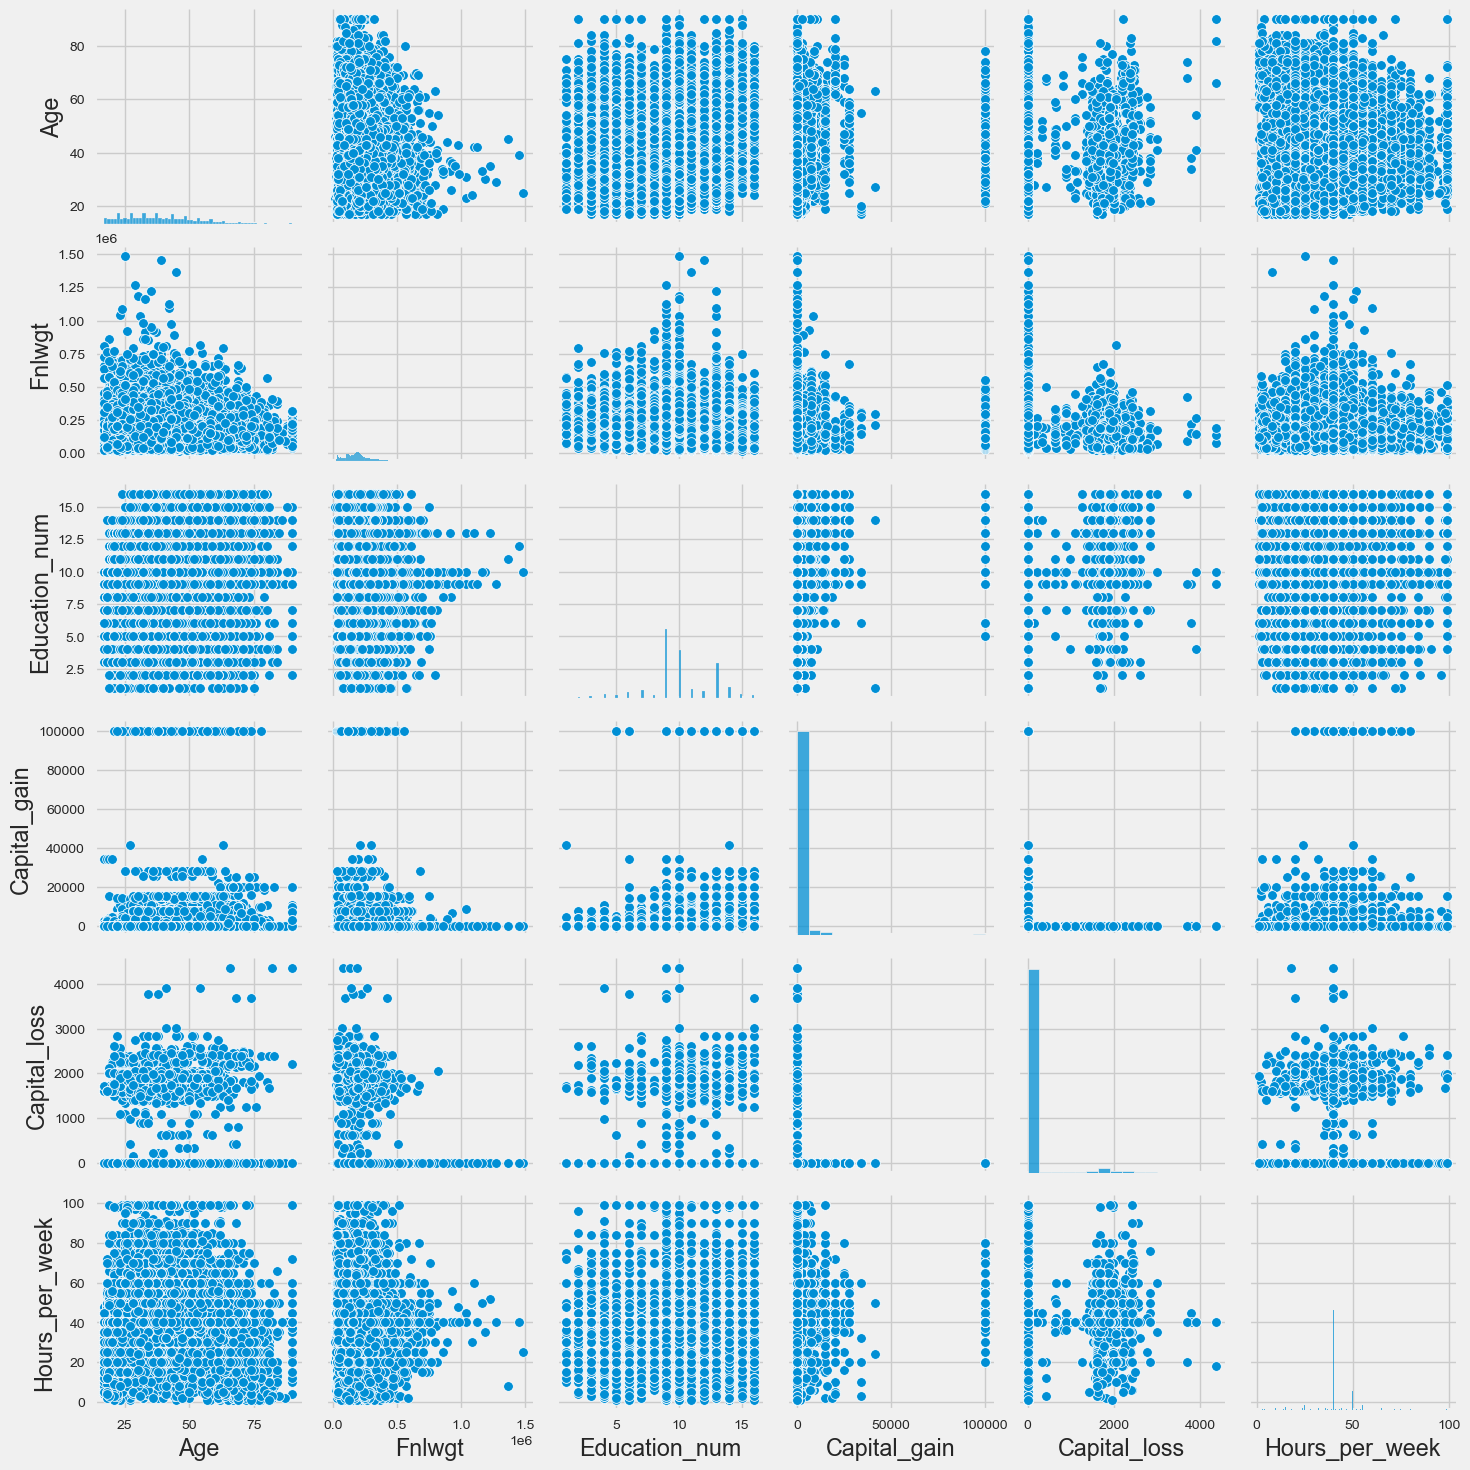

In [24]:
# Creating a pairplot of dataset

sns.pairplot(df)
plt.show()

In [25]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [26]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

val=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in val:
    df[i]=le.fit_transform(df[i])

In [28]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [29]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now, All the data types are converted into integer type.

# Correlation

In [30]:
# Checking the Correlation with respect to target variable(Income):-

df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

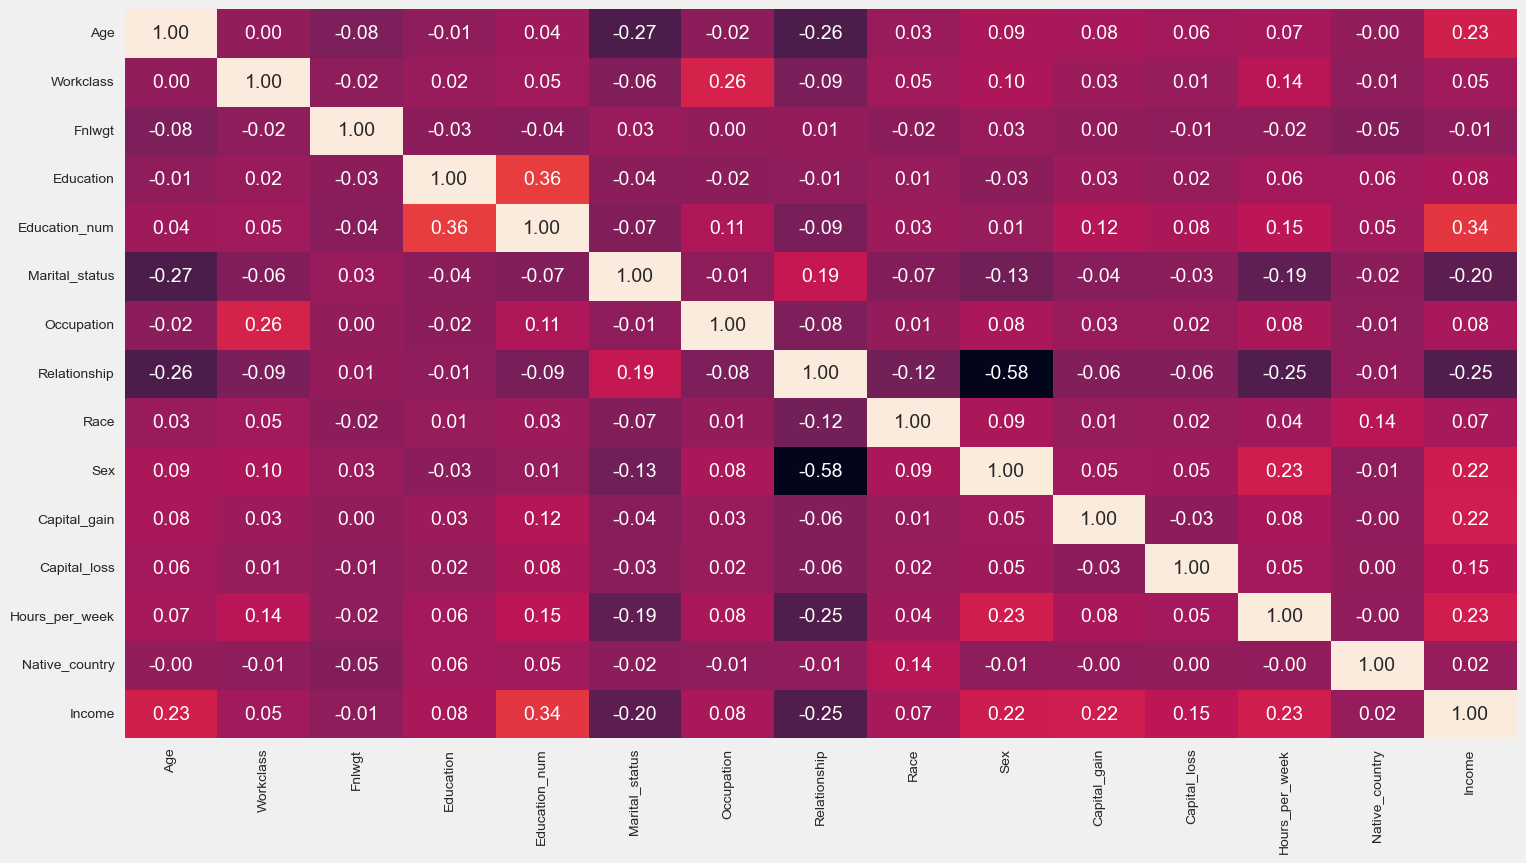

In [31]:
# correlation Plot
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above heatmap shows that 'Capital_gain','Hours_per_week','Age' and 'Education_num' are highly correlated with the target variable whereas, 'Fnlwgt','Native_country','Workclass','Race','Education' and 'Capital_loss' are less correlated with the target variable.

In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Feature Selection

In [33]:
# Drop the less correlated/non-relevant columns;

df=df.drop(['Fnlwgt','Native_country','Workclass','Race','Education','Capital_loss'],axis=1)
df

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,4,0,1,0,13,0
1,38,9,0,6,1,1,0,40,0
2,53,7,2,6,0,1,0,40,0
3,28,13,2,10,5,0,0,40,0
4,37,14,2,4,5,0,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38,0
32556,40,9,2,7,0,1,0,40,1
32557,58,9,6,1,4,0,0,40,0
32558,22,9,4,1,3,1,0,20,0


In [34]:
df.shape

(32560, 9)

# Checking for the Skewness

In [35]:
df.skew()

Age                0.558738
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Hours_per_week     0.227636
Income             1.212383
dtype: float64

Above data shows that 'Age','Relationship' and 'Capital_gain' are highly skewed.

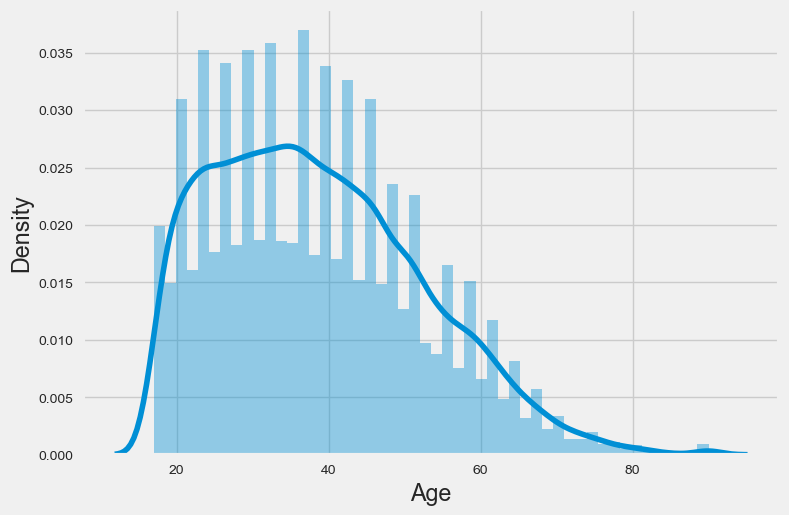

In [36]:
# checking with the distribution curve:-

sns.distplot(df['Age'])
plt.show()

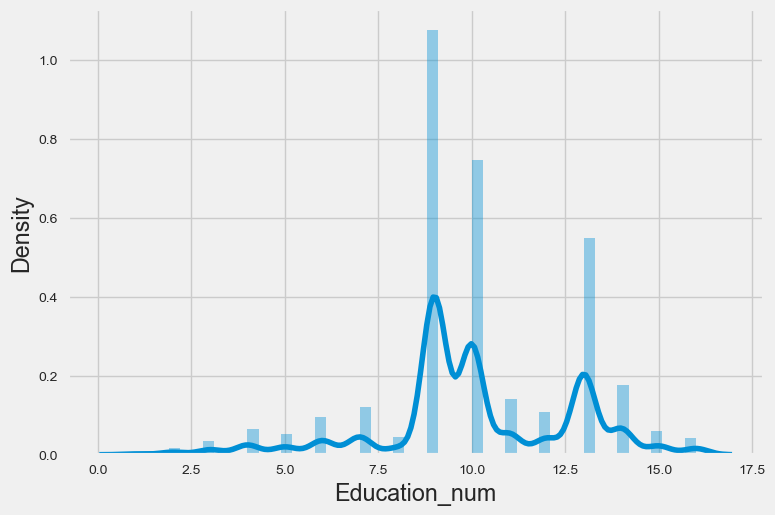

In [37]:
sns.distplot(df['Education_num'])
plt.show()

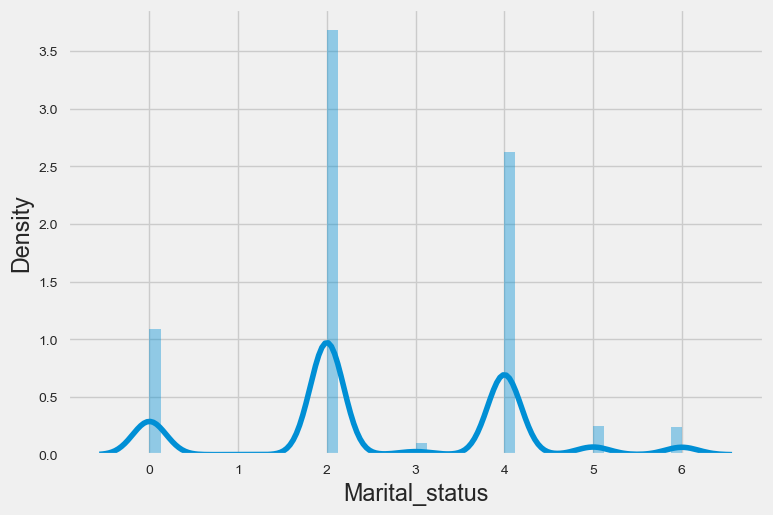

In [38]:
sns.distplot(df['Marital_status'])
plt.show()

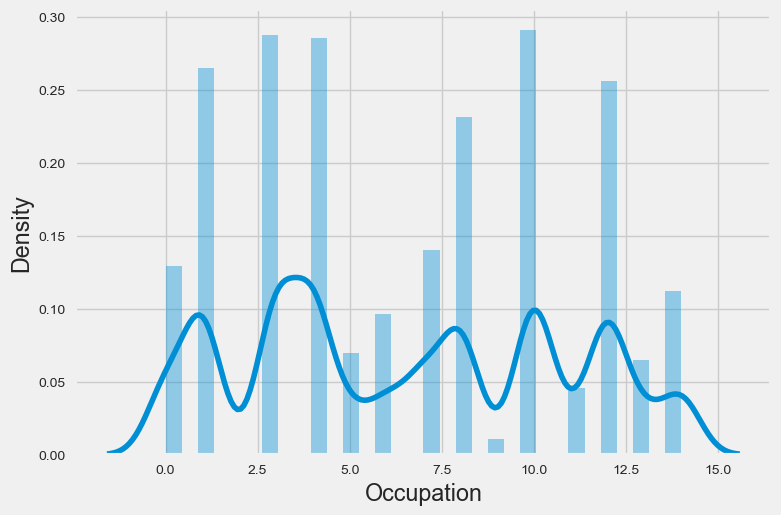

In [39]:
sns.distplot(df['Occupation'])
plt.show()

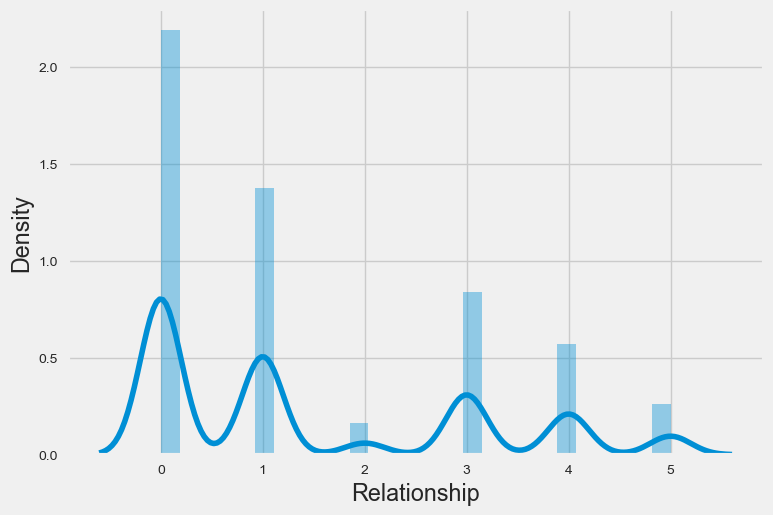

In [40]:
sns.distplot(df['Relationship'])
plt.show()

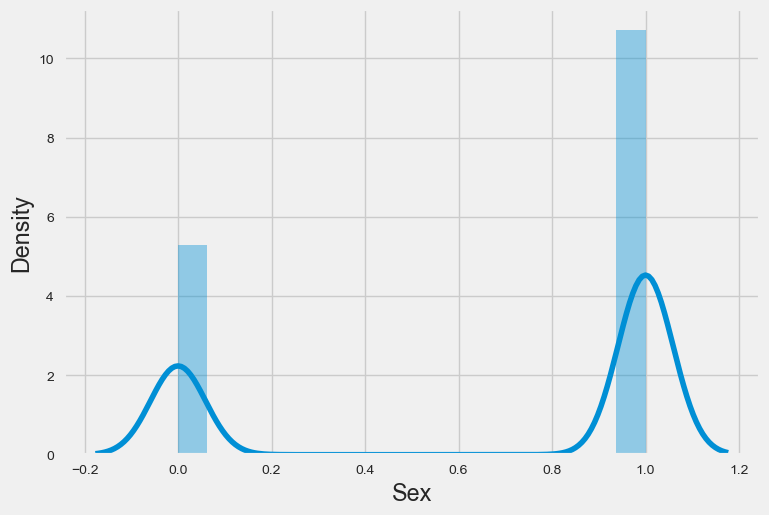

In [41]:
sns.distplot(df['Sex'])
plt.show()

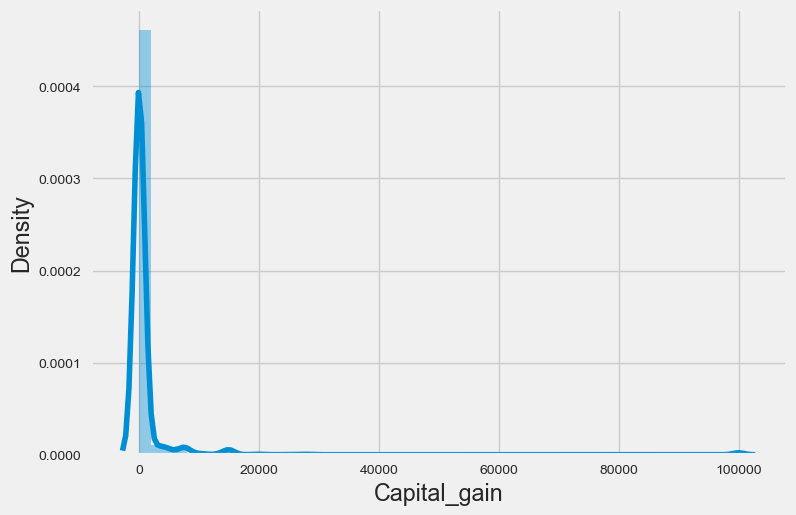

In [42]:
sns.distplot(df['Capital_gain'])
plt.show()

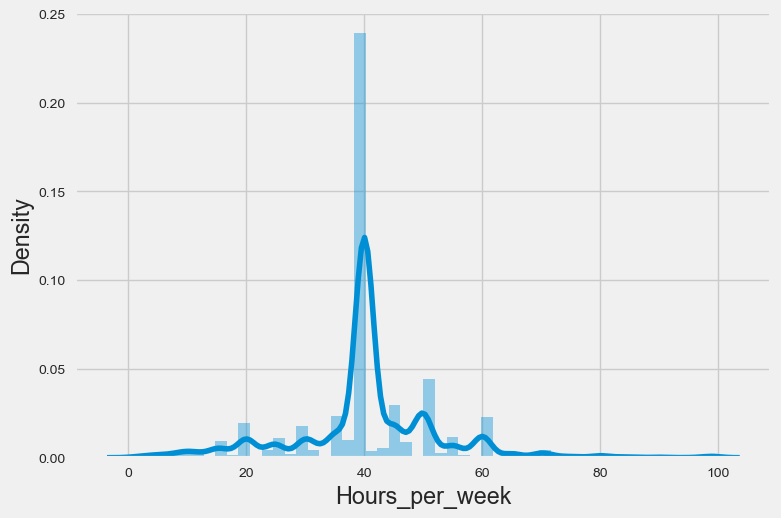

In [43]:
sns.distplot(df['Hours_per_week'])
plt.show()

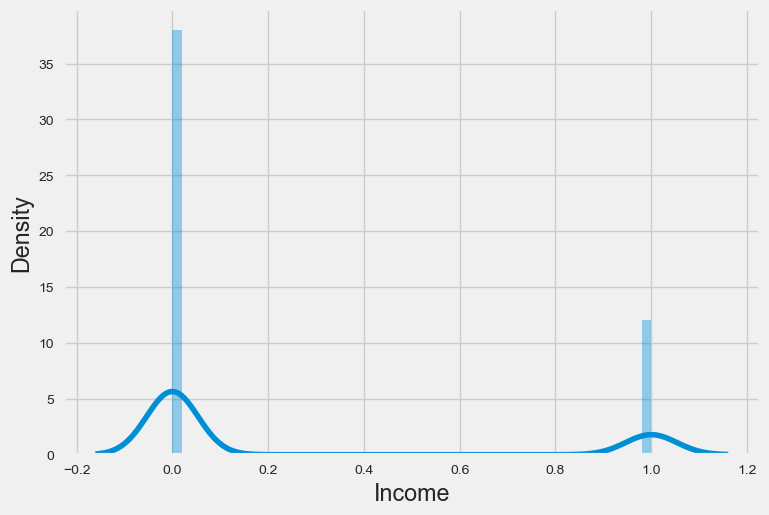

In [44]:
sns.distplot(df['Income'])
plt.show()

Above visualizations shows that the is not normalized. The building blocks is out of normalized curve.

# Outliers Removal

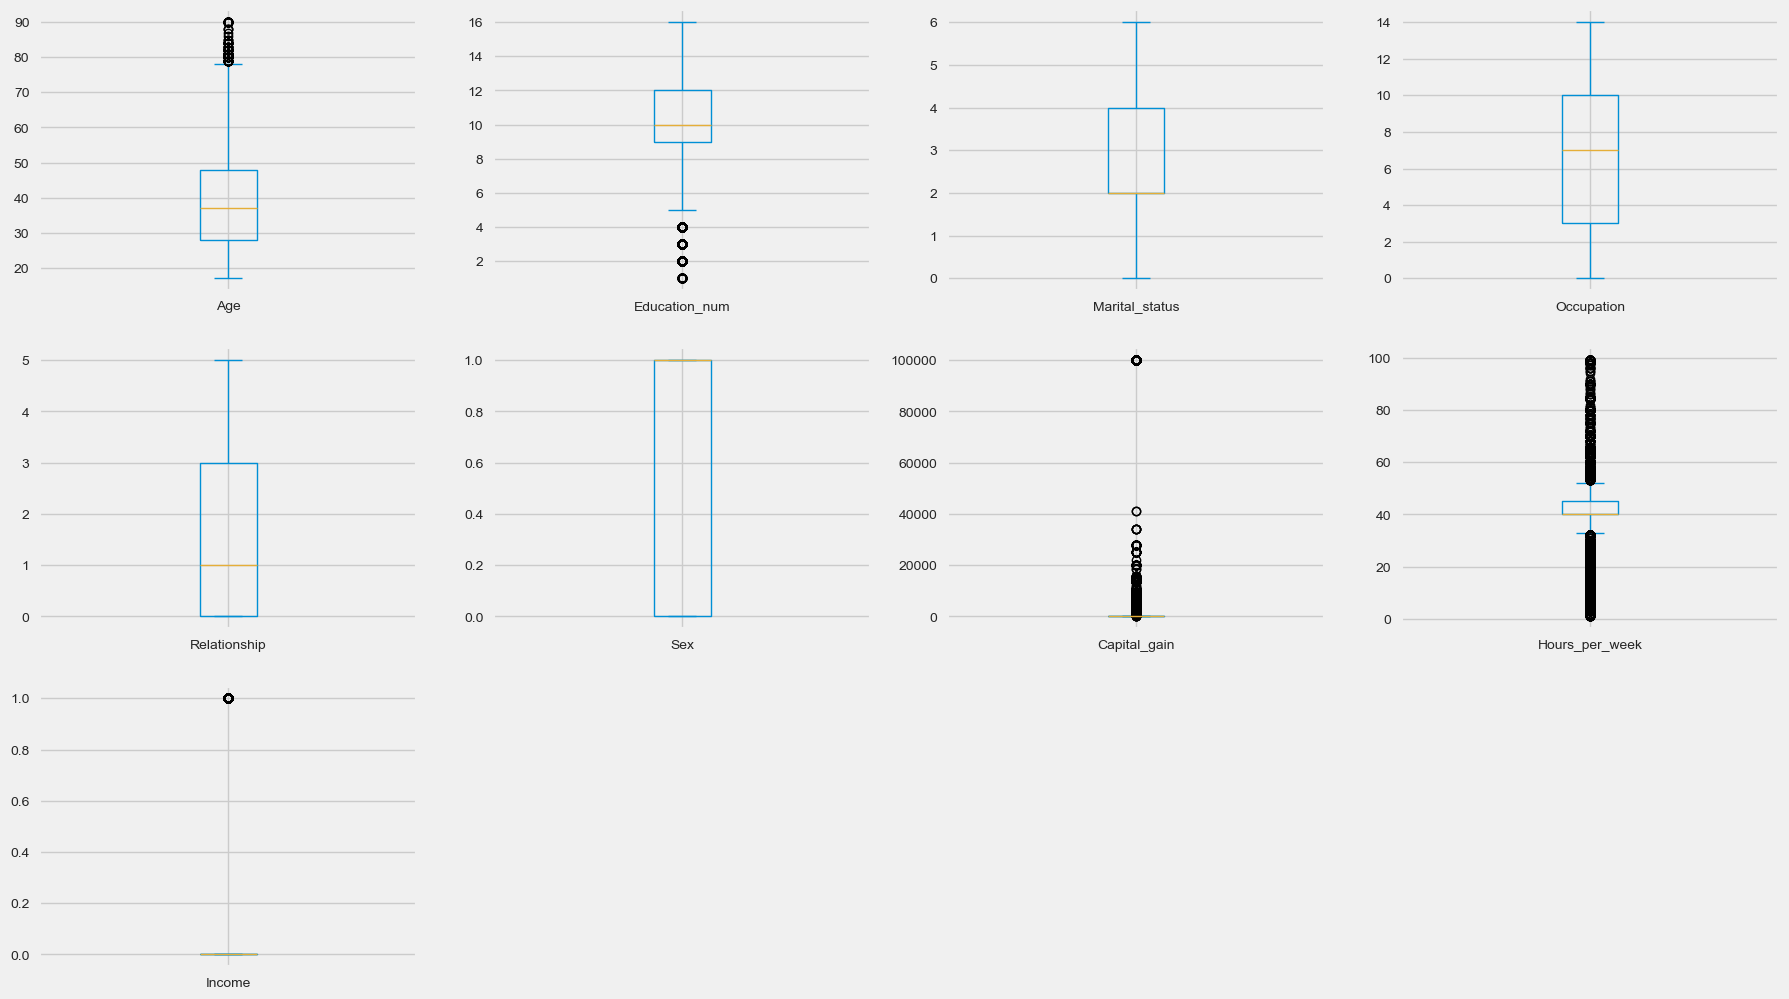

In [45]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,0.837097,1.134779,0.406183,0.608434,0.900177,0.703087,0.145914,2.222120,0.563210
1,0.042640,0.420027,1.734026,0.135480,0.277810,0.703087,0.145914,0.035430,0.563210
2,1.057031,1.197429,0.406183,0.135480,0.900177,0.703087,0.145914,0.035430,0.563210
3,0.775755,1.134779,0.406183,0.810427,2.211658,1.422298,0.145914,0.035430,0.563210
4,0.115952,1.523480,0.406183,0.608434,2.211658,1.422298,0.145914,0.035430,0.563210
...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.746077,0.406183,1.519858,2.211658,1.422298,0.145914,0.197407,0.563210
32556,0.103982,0.420027,0.406183,0.100997,0.900177,0.703087,0.145914,0.035430,1.775537
32557,1.423589,0.420027,2.249503,1.317864,1.589291,1.422298,0.145914,0.035430,0.563210
32558,1.215624,0.420027,0.921660,1.317864,0.966924,0.703087,0.145914,1.655200,0.563210


In [47]:
# index no.

np.where(z>3)

(array([    9,    27,    76,   105,   156,   159,   188,   220,   221,
          223,   271,   298,   415,   429,   462,   485,   519,   535,
          588,   703,   917,   928,   931,   934,  1033,  1035,  1039,
         1063,  1065,  1138,  1167,  1171,  1199,  1245,  1261,  1271,
         1290,  1367,  1410,  1416,  1457,  1481,  1499,  1527,  1561,
         1615,  1633,  1681,  1683,  1729,  1763,  1764,  1770,  1823,
         1825,  1886,  1912,  1928,  1934,  1986,  2014,  2102,  2302,
         2318,  2332,  2357,  2360,  2428,  2443,  2580,  2583,  2593,
         2670,  2706,  2753,  2760,  2816,  2860,  2883,  2890,  2905,
         2919,  2931,  2945,  2958,  2962,  3091,  3104,  3174,  3210,
         3224,  3231,  3290,  3301,  3342,  3367,  3445,  3536,  3577,
         3591,  3748,  3772,  3776,  3835,  3908,  3940,  3962,  4069,
         4085,  4090,  4100,  4106,  4108,  4235,  4293,  4302,  4307,
         4311,  4321,  4325,  4336,  4347,  4388,  4420,  4440,  4523,
      

In [48]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,4,0,1,0,13,0
1,38,9,0,6,1,1,0,40,0
2,53,7,2,6,0,1,0,40,0
3,28,13,2,10,5,0,0,40,0
4,37,14,2,4,5,0,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38,0
32556,40,9,2,7,0,1,0,40,1
32557,58,9,6,1,4,0,0,40,0
32558,22,9,4,1,3,1,0,20,0


In [49]:
df.shape

(32560, 9)

In [50]:
df_new.shape

(31586, 9)

In [51]:
# percentage data loss:-

loss_percent=(32560-31586)/(32560*100)
print(loss_percent,'%')

0.00029914004914004917 %


In [52]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df,method='yeo-johnson')
X

array([[ 0.89194656,  1.16479277, -0.38342726, ..., -0.30136989,
        -2.22151541, -0.5632099 ],
       [ 0.10271741, -0.4643296 , -1.78243401, ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       [ 1.06438077, -1.20027437, -0.38342726, ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       ...,
       [ 1.33455599, -0.4643296 ,  2.1717841 , ..., -0.30136989,
        -0.03557001, -0.5632099 ],
       [-1.35834147, -0.4643296 ,  0.91971919, ..., -0.30136989,
        -1.65499204, -0.5632099 ],
       [ 1.00782289, -0.4643296 , -0.38342726, ...,  3.31823374,
        -0.03557001,  1.77553698]])

In [53]:
X.ndim

2

In [54]:
X.std()

1.0000000000000002

In [55]:
x=df_new.drop(['Income'],axis=1)
x

,Age,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Hours_per_week
0,50,13,2,4,0,1,0,13
1,38,9,0,6,1,1,0,40
2,53,7,2,6,0,1,0,40
3,28,13,2,10,5,0,0,40
4,37,14,2,4,5,0,0,40
...,...,...,...,...,...,...,...,...
32555,27,12,2,13,5,0,0,38
32556,40,9,2,7,0,1,0,40
32557,58,9,6,1,4,0,0,40
32558,22,9,4,1,3,1,0,20


In [56]:
y=df_new['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31586, dtype: int32

# Oversampling to resolve imbalancing of the dataset

In [57]:
x.shape

(31586, 8)

In [58]:
y.shape

(31586,)

In [59]:
from imblearn.over_sampling import SMOTE
y.value_counts()

Income
0    24103
1     7483
Name: count, dtype: int64

In [60]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [61]:
y_traint.value_counts()

Income
0    24103
1    24103
Name: count, dtype: int64

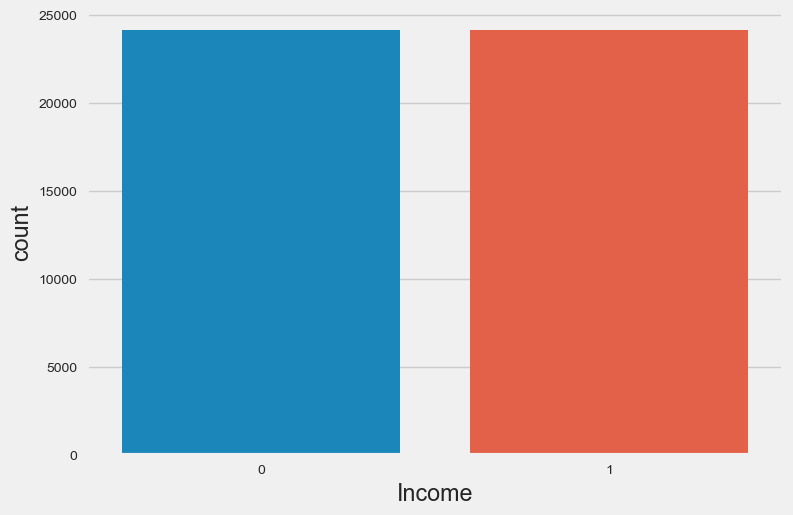

In [62]:
sns.countplot(x=y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing of AveragePrice

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.7434142294129849 random_state 1


max_accuracy 0.7434142294129849 max_random_state 1
accuracy 0.7422733872640531 random_state 2


accuracy 0.7444513586392865 random_state 3


max_accuracy 0.7444513586392865 max_random_state 3
accuracy 0.746110765401369 random_state 4


max_accuracy 0.746110765401369 max_random_state 4
accuracy 0.744140219871396 random_state 5


accuracy 0.7432068035677245 random_state 6


accuracy 0.7364654635967641 random_state 7


accuracy 0.7503629952292056 random_state 8


max_accuracy 0.7503629952292056 max_random_state 8
accuracy 0.73376892760838 random_state 9


accuracy 0.7439327940261357 random_state 10


accuracy 0.7424808131093135 random_state 11


accuracy 0.7377100186683261 random_state 12


accuracy 0.7336652146857499 random_state 13


accuracy 0.748703588467123 random_state 14


accuracy 0.7471478946276706 random_state 15


accuracy 0.7370877411325452 random_state 16


accuracy 0.7385397220493674 random_state 17


accuracy 0.7438290811035055 r

In [65]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.758452603194358 on Random_state 49


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=49)

In [67]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 79.28141817030706
[[4519  329]
 [ 980  490]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4848
           1       0.60      0.33      0.43      1470

    accuracy                           0.79      6318
   macro avg       0.71      0.63      0.65      6318
weighted avg       0.77      0.79      0.77      6318



In [68]:
# Naive Bayes Classifier;

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gnb)*100)
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

Accuracy 82.4628046850269
[[4600  248]
 [ 860  610]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4848
           1       0.71      0.41      0.52      1470

    accuracy                           0.82      6318
   macro avg       0.78      0.68      0.71      6318
weighted avg       0.81      0.82      0.81      6318



In [69]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 83.64988920544477
[[4494  354]
 [ 679  791]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4848
           1       0.69      0.54      0.60      1470

    accuracy                           0.84      6318
   macro avg       0.78      0.73      0.75      6318
weighted avg       0.83      0.84      0.83      6318



In [70]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.43684710351377
[[4278  570]
 [ 666  804]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4848
           1       0.59      0.55      0.57      1470

    accuracy                           0.80      6318
   macro avg       0.73      0.71      0.72      6318
weighted avg       0.80      0.80      0.80      6318



In [71]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 82.87432731877176
[[4401  447]
 [ 635  835]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4848
           1       0.65      0.57      0.61      1470

    accuracy                           0.83      6318
   macro avg       0.76      0.74      0.75      6318
weighted avg       0.82      0.83      0.82      6318



In [72]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 85.7866413421969
[[4525  323]
 [ 575  895]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4848
           1       0.73      0.61      0.67      1470

    accuracy                           0.86      6318
   macro avg       0.81      0.77      0.79      6318
weighted avg       0.85      0.86      0.85      6318



In [73]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 86.1665083887306
[[4572  276]
 [ 598  872]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4848
           1       0.76      0.59      0.67      1470

    accuracy                           0.86      6318
   macro avg       0.82      0.77      0.79      6318
weighted avg       0.86      0.86      0.86      6318



Therefore, Gradient Boosting Classifier shows the best metrics results among other models.

In [74]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.73081949 0.72391264 0.74178491 0.73973114 0.74365198 0.75224048
 0.74477222 0.75037341 0.75690814]
Mean of Cross validation score: 0.7426882679419511
Accuracy 79.28141817030706


In [75]:
# Cross Validation for gaussian naive bayes classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gnb,x_traint,y_traint,cv=9)
print('Cross validation score of gaussian naive bayes model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gnb)*100)

Cross validation score of gaussian naive bayes model: [0.76591376 0.77319395 0.77856609 0.76493652 0.78117999 0.77893951
 0.77427184 0.78342046 0.78286034]
Mean of Cross validation score: 0.7759202740911638
Accuracy 82.4628046850269


In [76]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.80996827 0.81146164 0.82430919 0.84802091 0.85082151 0.83663181
 0.84802091 0.85567588 0.84914115]
Mean of Cross validation score: 0.8371168071134181
Accuracy 83.64988920544477


In [77]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.82042188 0.81519507 0.82524272 0.85941001 0.8650112  0.8648245
 0.8648245  0.8650112  0.85810306]
Mean of Cross validation score: 0.848671570472372
Accuracy 80.43684710351377


In [78]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)


Cross validation score of Random Forest Classifier model: [0.84095576 0.83983573 0.84671397 0.88256161 0.88984317 0.88928305
 0.88629574 0.88685586 0.88293503]
Mean of Cross validation score: 0.8716977679966855
Accuracy 82.87432731877176


In [79]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.81780847 0.81874183 0.83140403 0.83084391 0.84671397 0.84596714
 0.84036594 0.8504481  0.84410007]
Mean of Cross validation score: 0.8362659416167122
Accuracy 85.7866413421969


In [80]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.81986186 0.82471533 0.83196415 0.83887229 0.85082151 0.85511576
 0.84615385 0.85455564 0.85268857]
Mean of Cross validation score: 0.8416387731891809
Accuracy 86.1665083887306


Therefore the difference between cv score and r2 score in very less in case of Gradient Boosting Classifier that is [0.862-0.855=0.007],So we will choose this model for further process.

# Hyperparameter Tuning

In [81]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'subsample':[0.6,0.7,0.8,1.0],
            'n_estimators':[100,200,300,400]}


In [83]:
GCV=GridSearchCV(estimator=GradientBoostingClassifier(),
                 param_grid=parameters,cv=6,
                scoring=accuracy_score)

In [84]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100, 'subsample': 0.6}

In [85]:
gb=GradientBoostingClassifier(subsample=0.6,max_depth=4,max_features='auto',n_estimators=100)
gb.fit(x_train,y_train)
train_accuracy=gb.score(x_train,y_train)
pred_decision=gb.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
gbs=cross_val_score(gb,x_traint,y_traint,cv=5)
gbc=gb.score(x_train,y_train)
print('Cross_Val_Score',gbc*100)

0.8665110020579389
Accuracy_Score 0.863880974992086
Cross_Val_Score 86.65110020579388


In [86]:
GCV.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='auto', subsample=0.6)

# ROC AUC plot

In [87]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\HP\anaconda3\anaconda_new\Lib\site-packages\sklearn\metrics\__init__.py)

# Saving the Model

In [ ]:
import pickle
filename='Census_Income_Pred.pkl'
pickle.dump(gb,open(filename,'wb'))

# Conclusion

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gb.predict(x_test))
Census_Income=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Census_Income